<a href="https://colab.research.google.com/github/m-wessler/gefs-ai-ml/blob/main/XGBoost_Example_MaxT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [53]:
# Exclusions
exclude = ['sid', 'elev_ft', 'state', 'init_datetime', 'fcst_hour', 'perturbation',
           'pres_sfc', 'hgt_sfc', 'tmin_2m', 'tmp_2m', 'tmin_obs',

'tmp_pres_700',
'vgrd_pres_850',
'ugrd_pres_700',
'vgrd_pres_925',
'tmp_pres_925',
'tmin_2m',
'spfh_pres_850',
'ugrd_pres_925',
'tmp_2m',
'hgt_pres_925',
'spfh_pres_925',
'hgt_pres_850',
'spfh_pres_700',
'pres_sfc']

In [54]:
files = glob.glob('./*f0*.csv') #['/content/KSLC_2000_2006_f120.csv', '/content/KSLC_2000_2006_f168.csv', '/content/KSLC_2000_2006_f240.csv']
print(files)

df = pd.concat([pd.read_csv(f) for f in files]).set_index('valid_datetime')
df = df[[col for col in df.columns if col not in exclude]]
df.dropna(how='any', inplace=True)

y = df.pop('tmax_obs')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.sort_index()

['./KSLC_2000_2006_f024.csv', './KSLC_2000_2006_f006.csv', './KSLC_2000_2006_f048.csv', './KSLC_2000_2006_f012.csv', './KSLC_2000_2006_f072.csv']


,pres_msl,hgt_pres_700,tmp_pres_850,tmax_2m,spfh_2m,gust_sfc,ugrd_hgt,ugrd_pres_850,vgrd_hgt,vgrd_pres_700,...,lhtfl_sfc,shtfl_sfc,gflux_sfc,cape_sfc,cin_sfc,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc
valid_datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 06:00,101481.89750,2996.45300,0.23,-2.03,0.00247,3.26332,-2.21138,-2.13263,2.31553,4.96828,...,4.31877,-45.72180,32.3000,0.0000,0.00804,19999.93206,0.4125,35.6,0.02909,-0.02956
2000-01-01 06:00,101454.00250,2992.94575,0.02,-1.99,0.00240,3.40544,-2.41329,-2.30375,2.38201,4.51338,...,3.54919,-47.46655,33.6000,0.0000,-0.02698,20000.04320,0.4130,12.4,0.03094,-0.03077
2000-01-01 06:00,101552.98875,3003.44500,0.26,-1.86,0.00249,3.16338,-2.01949,-1.94807,2.24113,4.46985,...,4.60037,-45.26910,31.4000,0.0000,-0.03989,20000.03646,0.4050,44.5,0.02695,-0.02993
2000-01-01 06:00,101532.51250,2999.41788,-0.14,-2.09,0.00232,3.27201,-2.22764,-2.11040,2.33987,5.33264,...,5.99529,-45.82188,32.0000,0.0000,-0.00119,20000.13644,0.4140,45.1,0.02961,-0.03036
2000-01-01 06:00,101407.98500,2992.57475,0.49,-1.61,0.00270,3.17198,-2.13130,-2.05659,2.23090,5.57003,...,3.94902,-43.00338,28.9000,0.0000,0.04248,20000.20002,0.4140,61.0,0.02844,-0.02904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-03 00:00,103081.62500,3095.46800,-2.04,-1.12,0.00310,1.02110,0.58400,0.51900,0.25100,-5.43180,...,16.00780,27.83450,-66.8298,1.3333,0.01290,9512.85060,0.4330,85.0,-0.01300,0.00200
2007-01-03 00:00,103081.41410,3087.94210,-2.75,-1.98,0.00300,1.30410,0.74570,0.71460,0.12850,-4.27600,...,16.63370,33.82410,-54.9955,1.3333,-0.15240,9702.31640,0.4310,87.0,-0.01890,-0.00230
2007-01-03 00:00,103259.32030,3111.65500,-2.37,-1.39,0.00300,1.23020,0.77750,0.68930,-0.34990,-6.03880,...,19.73340,41.06780,-91.8968,1.3333,-0.02440,9536.92770,0.4347,78.0,-0.01810,0.01000


In [55]:
X_train.describe()

,pres_msl,hgt_pres_700,tmp_pres_850,tmax_2m,spfh_2m,gust_sfc,ugrd_hgt,ugrd_pres_850,vgrd_hgt,vgrd_pres_700,...,lhtfl_sfc,shtfl_sfc,gflux_sfc,cape_sfc,cin_sfc,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc
count,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,...,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000
mean,101636.319352,3088.348112,11.334670,11.484833,0.004597,4.153536,0.162058,0.185433,0.674416,1.319084,...,91.211035,58.389188,-19.686761,43.207756,-11.798994,16598.056567,0.228156,48.731623,-0.030135,-0.018458
std,773.948480,74.028396,10.258389,10.740507,0.001831,2.557670,2.202562,2.199458,2.448378,5.486672,...,101.999959,99.251702,53.711918,122.531140,32.592863,5428.910017,0.116777,40.180046,0.081818,0.107335
min,95067.914100,2473.152600,-15.140000,-17.460000,0.000700,0.426300,-9.412460,-11.632700,-9.216550,-15.340660,...,-15.462650,-95.717100,-263.254100,0.000000,-486.043900,1604.995200,0.044000,0.000000,-1.103520,-1.385500
25%,101114.570300,3035.834000,2.880000,2.550000,0.003300,2.470800,-1.690300,-1.661600,-1.194840,-2.573730,...,11.688200,-22.853900,-52.312500,0.000000,-6.077100,14300.249000,0.120000,2.000000,-0.071000,-0.046400
50%,101511.906200,3093.944100,10.240000,10.290000,0.004300,3.448600,0.375900,0.362420,0.587200,0.839800,...,44.205300,21.757700,-20.434010,0.000000,-0.132300,19999.923800,0.225500,49.000000,-0.011200,-0.005200
75%,102074.226600,3148.615380,19.670000,19.450000,0.005560,5.012370,1.863000,1.732300,2.247550,4.695600,...,147.732440,134.102900,23.186600,17.500000,0.006400,20000.043000,0.304000,93.000000,0.018800,0.033700
max,105126.000000,3261.763400,35.350000,36.920000,0.013200,24.192000,11.515880,13.542630,11.769600,28.257350,...,506.180000,402.730740,164.062500,1644.333400,0.575500,20000.347700,0.437000,149.000000,1.037600,0.785290


In [56]:
X_test.describe()

,pres_msl,hgt_pres_700,tmp_pres_850,tmax_2m,spfh_2m,gust_sfc,ugrd_hgt,ugrd_pres_850,vgrd_hgt,vgrd_pres_700,...,lhtfl_sfc,shtfl_sfc,gflux_sfc,cape_sfc,cin_sfc,hgt_ceiling,soilw_bgrnd,tcdc_eatm,uflx_sfc,vflx_sfc
count,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,...,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000
mean,101641.507633,3087.895364,11.223149,11.365747,0.004594,4.169745,0.161375,0.186116,0.674259,1.363378,...,90.468656,57.605345,-19.139095,45.043520,-11.330175,16587.329946,0.228710,49.565753,-0.030006,-0.018526
std,780.219849,73.565564,10.231717,10.721098,0.001839,2.563294,2.203448,2.199567,2.452185,5.456935,...,101.821633,98.542448,53.105586,126.276740,31.231007,5418.630409,0.115998,40.274739,0.080352,0.107661
min,99352.929700,2820.602300,-14.320000,-16.560000,0.000700,0.485500,-6.388640,-8.110100,-7.725390,-15.666700,...,-13.578200,-93.189330,-264.076300,0.000000,-429.573500,1606.232300,0.045000,0.000000,-0.869000,-1.093500
25%,101115.263665,3035.642450,2.800000,2.510000,0.003300,2.479862,-1.706950,-1.677400,-1.223950,-2.515800,...,11.310350,-22.721350,-52.159150,0.000000,-5.746075,14157.376975,0.122000,2.025000,-0.071700,-0.045500
50%,101521.940835,3093.005000,9.920000,10.090000,0.004300,3.451300,0.378000,0.364900,0.601150,0.770850,...,44.008965,20.494800,-19.121950,0.000000,-0.131150,19999.925745,0.226300,50.000000,-0.011295,-0.005200
75%,102080.716825,3147.995600,19.590000,19.350000,0.005520,5.042663,1.867790,1.741125,2.251650,4.689782,...,145.874975,133.884637,23.401283,16.458333,0.005300,20000.041000,0.303700,94.000000,0.019400,0.034938
max,104939.414100,3251.313700,35.540000,37.150000,0.012800,21.469600,9.838100,10.858710,11.797000,27.258000,...,498.191300,370.772600,121.801400,1199.333330,0.482000,20000.351600,0.437000,149.600000,0.547980,0.580560


In [57]:
pd.DataFrame(y_train).describe()

,tmax_obs
count,49461.000000
mean,15.946712
std,12.013572
min,-12.800000
25%,6.100000
50%,15.000000
75%,26.100000
max,41.700000


In [58]:
pd.DataFrame(y_test).describe()

,tmax_obs
count,12366.000000
mean,15.766982
std,12.021479
min,-11.100000
25%,6.100000
50%,14.400000
75%,26.100000
max,41.700000


In [59]:
# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)

r2_lr = r2_score(y_test, linear_predictions)
mae_lr = mean_absolute_error(y_test, linear_predictions)
rmse_lr = np.sqrt(mean_squared_error(y_test, linear_predictions))

In [ ]:
    # n_estimators_range = range(50, 300, 10)  # n_estimators from 10 to 250 with step size 10
    # learning_rate_range = range(0.01, 0.25, 0.025)  # learning_rate from 0.01 to 0.5 with 10 equally spaced values
    # print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate:.2f}, R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm

def evaluate_model(params):
    """
    Evaluate the XGBRegressor model for a given set of hyperparameters.
    This function is designed to be used in parallel execution.

    Parameters:
    - params: Dictionary containing `n_estimators`, `learning_rate`,
              `X_train`, `y_train`, `X_test`, `y_test`, and `optimize_for`.

    Returns:
    - A tuple (metric_value, params, metrics) where `metric_value` is the selected
      optimization metric, `params` contains the hyperparameters,
      and `metrics` contains detailed performance metrics (r², MAE, RMSE).
    """
    n_estimators = params['n_estimators']
    learning_rate = params['learning_rate']
    X_train = params['X_train']
    y_train = params['y_train']
    X_test = params['X_test']
    y_test = params['y_test']
    optimize_for = params['optimize_for']

    # Create XGBRegressor with the provided hyperparameters
    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test data
    predictions = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Select optimization metric
    metric_value = {
        'r2': r2,        # Higher is better
        'mae': mae,      # Lower is better
        'rmse': rmse     # Lower is better
    }[optimize_for]

    # Return the metric value, hyperparameters, and detailed metrics
    return metric_value, {'n_estimators': n_estimators, 'learning_rate': learning_rate}, {'r2': r2, 'mae': mae, 'rmse': rmse}

def tune_xgbregressor_parallel(X_train, y_train, X_test, y_test, **kwargs):
    """
    Parallel tuning of an XGBRegressor model by iterating over hyperparameters `n_estimators` and `learning_rate`.

    Parameters:
    - X_train: Training features
    - y_train: Training target
    - X_test: Testing features
    - y_test: Testing target
    - kwargs: A dictionary including:
        - 'n_estimators_min': Minimum value for n_estimators
        - 'n_estimators_max': Maximum value for n_estimators
        - 'n_estimators_step': Step size for n_estimators
        - 'learning_rate_min': Minimum value for learning_rate
        - 'learning_rate_max': Maximum value for learning_rate
        - 'learning_rate_steps': Number of equally spaced values for learning_rate
        - 'optimize_for': Metric to optimize for ('r2', 'mae', or 'rmse')
        - 'max_workers': Maximum number of workers for parallel execution (default: None, uses all available processors)

    Returns:
    - best_model: The model with the best performance
    - best_params: Dictionary of the best hyperparameters
    - best_metric: The best value of the selected metric
    """
    n_estimators_min = kwargs.get('n_estimators_min', 10)
    n_estimators_max = kwargs.get('n_estimators_max', 250)
    n_estimators_step = kwargs.get('n_estimators_step', 10)
    learning_rate_min = kwargs.get('learning_rate_min', 0.01)
    learning_rate_max = kwargs.get('learning_rate_max', 0.5)
    learning_rate_steps = kwargs.get('learning_rate_steps', 10)
    optimize_for = kwargs.get('optimize_for', 'r2')
    max_workers = kwargs.get('max_workers', None)

    # Define the range of hyperparameters
    n_estimators_range = range(n_estimators_min, n_estimators_max + 1, n_estimators_step)
    learning_rate_range = np.linspace(learning_rate_min, learning_rate_max, learning_rate_steps)

    # Prepare parameter combinations
    param_combinations = [
        {
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'optimize_for': optimize_for
        }
        for n_estimators in n_estimators_range
        for learning_rate in learning_rate_range
    ]

    # Use ThreadPoolExecutor for parallel execution
    best_metric = float('-inf') if optimize_for == 'r2' else float('inf')
    best_params = None

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Submit all parameter combinations to the executor
        futures = [executor.submit(evaluate_model, params) for params in param_combinations]

        # Use tqdm.notebook to display a progress bar
        with tqdm(total=len(futures), desc="Tuning Progress", leave=True) as pbar:
            for future in as_completed(futures):
                metric_value, params, metrics = future.result()

                # Update the best result based on the optimization metric
                if (optimize_for == 'r2' and metric_value > best_metric) or \
                   (optimize_for in ['mae', 'rmse'] and metric_value < best_metric):
                    best_metric = metric_value
                    best_params = params

                # Log detailed information below the progress bar
                tqdm.write(f"Evaluated n_estimators={params['n_estimators']}, "
                           f"learning_rate={params['learning_rate']:.2f} -> "
                           f"R²={metrics['r2']:.4f}, MAE={metrics['mae']:.4f}, RMSE={metrics['rmse']:.4f}")

                # Update the progress bar
                pbar.update(1)

    # Train the best model with the optimal parameters
    best_model = XGBRegressor(n_estimators=best_params['n_estimators'],
                              learning_rate=best_params['learning_rate'],
                              random_state=42)
    best_model.fit(X_train, y_train)

    # Return the best model, parameters, and metric
    return best_model, best_params, best_metric

kwargs = {
    'n_estimators_min': 300,
    'n_estimators_max': 300,
    'n_estimators_step': 1,
    'learning_rate_min': 0.1,
    'learning_rate_max': 0.3,
    'learning_rate_steps': 25,
    'optimize_for': 'rmse', #['rmse', 'mae', 'r2']
    'max_workers': 4
}

best_model, best_params, best_metric = tune_xgbregressor_parallel(X_train, y_train, X_test, y_test, **kwargs)

Tuning Progress:   0%|          | 0/25 [00:00<?, ?it/s]

Evaluated n_estimators=300, learning_rate=0.11 -> R²=0.9841, MAE=1.0993, RMSE=1.5139
Evaluated n_estimators=300, learning_rate=0.10 -> R²=0.9837, MAE=1.1131, RMSE=1.5346
Evaluated n_estimators=300, learning_rate=0.12 -> R²=0.9842, MAE=1.0933, RMSE=1.5094
Evaluated n_estimators=300, learning_rate=0.12 -> R²=0.9846, MAE=1.0841, RMSE=1.4909
Evaluated n_estimators=300, learning_rate=0.13 -> R²=0.9846, MAE=1.0753, RMSE=1.4930
Evaluated n_estimators=300, learning_rate=0.15 -> R²=0.9849, MAE=1.0674, RMSE=1.4783
Evaluated n_estimators=300, learning_rate=0.14 -> R²=0.9849, MAE=1.0695, RMSE=1.4790
Evaluated n_estimators=300, learning_rate=0.16 -> R²=0.9851, MAE=1.0578, RMSE=1.4679
Evaluated n_estimators=300, learning_rate=0.17 -> R²=0.9853, MAE=1.0425, RMSE=1.4560
Evaluated n_estimators=300, learning_rate=0.17 -> R²=0.9852, MAE=1.0564, RMSE=1.4608
Evaluated n_estimators=300, learning_rate=0.19 -> R²=0.9857, MAE=1.0345, RMSE=1.4379
Evaluated n_estimators=300, learning_rate=0.18 -> R²=0.9856, MAE=

In [61]:
print("Best Model:", best_model)
print("\nBest Parameters:", best_params)
print("\nBest Metric:", best_metric)

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None,
             learning_rate=np.float64(0.29166666666666663), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Best Parameters: {'n_estimators': 300, 'learning_rate': np.float64(0.29166666666666663)}

Best Metric: 1.4074121164849989


In [62]:
# Create an XGBRegressor
model = XGBRegressor(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], random_state=42)
# model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict numeric values on the test data
xgb_predictions = model.predict(X_test)

r2_xgb = r2_score(y_test, xgb_predictions)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"R²: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")

R²: 0.9863
MAE: 1.0033
RMSE: 1.4074


In [63]:
fhr_str = ""
station_str = ""
years = []

for file in files:
    parts = file.split('_')
    station = parts[0].split('/')[-1] # Extract station name and handle potential path
    year_range = parts[1] + "_" + parts[2]
    fhr = parts[3].split('.')[0]

    if fhr not in fhr_str:
        fhr_str += fhr + ", "

    if station not in station_str:
        station_str += station + ","

    year_parts = year_range.split('_')
    years.extend([int(year) for year in year_parts])

# Remove the trailing comma from strings
fhr_str = fhr_str[:-1]
station_str = station_str[:-1]

# Generate year string
year_str = str(min(years)) + "-" + str(max(years))

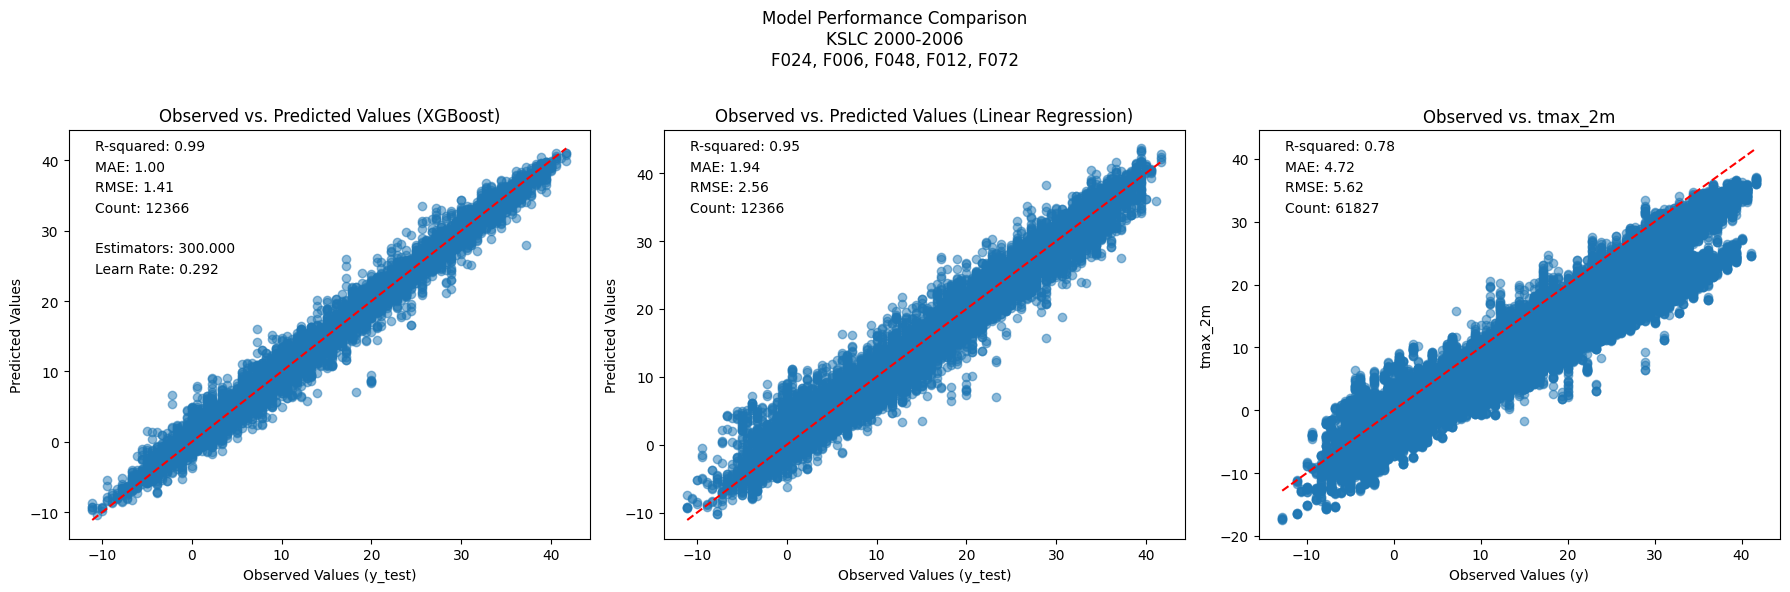

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: XGBoost
axes[0].scatter(y_test, xgb_predictions, alpha=0.5)
axes[0].set_xlabel("Observed Values (y_test)")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Observed vs. Predicted Values (XGBoost)")
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
axes[0].text(0.05, 0.95, f"R-squared: {r2_xgb:.2f}", transform=axes[0].transAxes)
axes[0].text(0.05, 0.90, f"MAE: {mae_xgb:.2f}", transform=axes[0].transAxes)
axes[0].text(0.05, 0.85, f"RMSE: {rmse_xgb:.2f}", transform=axes[0].transAxes)
axes[0].text(0.05, 0.80, f"Count: {y_test.size:d}", transform=axes[0].transAxes)
axes[0].text(0.05, 0.70, f"Estimators: {best_params['n_estimators']:.3f}", transform=axes[0].transAxes)
axes[0].text(0.05, 0.65, f"Learn Rate: {best_params['learning_rate']:.3f}", transform=axes[0].transAxes)

# Plot 2: Linear Regression
axes[1].scatter(y_test, linear_predictions, alpha=0.5)
axes[1].set_xlabel("Observed Values (y_test)")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title("Observed vs. Predicted Values (Linear Regression)")
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

axes[1].text(0.05, 0.95, f"R-squared: {r2_lr:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.90, f"MAE: {mae_lr:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.85, f"RMSE: {rmse_lr:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.80, f"Count: {y_test.size:d}", transform=axes[1].transAxes)

# Plot 3: tmax_2m vs tmax_obs
axes[2].scatter(y, X['tmax_2m'], alpha=0.5)
axes[2].set_xlabel("Observed Values (y)")
axes[2].set_ylabel("tmax_2m")
axes[2].set_title("Observed vs. tmax_2m")
axes[2].plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
r2_tmax = r2_score(y, X['tmax_2m'])
mae_tmax = mean_absolute_error(y, X['tmax_2m'])
rmse_tmax = np.sqrt(mean_squared_error(y, X['tmax_2m']))
axes[2].text(0.05, 0.95, f"R-squared: {r2_tmax:.2f}", transform=axes[2].transAxes)
axes[2].text(0.05, 0.90, f"MAE: {mae_tmax:.2f}", transform=axes[2].transAxes)
axes[2].text(0.05, 0.85, f"RMSE: {rmse_tmax:.2f}", transform=axes[2].transAxes)
axes[2].text(0.05, 0.80, f"Count: {y.size:d}", transform=axes[2].transAxes)

title_str = f"{station_str} {year_str}\n{fhr_str.upper()[:-1]}\n"
plt.suptitle(f"Model Performance Comparison\n{title_str}", fontsize=12)

plt.tight_layout()
plt.show()